In this project, the expectation maximization algorithm was implemented on a Gaussian mixture model in 1 and 2 dimensions. In the 1-D case, a K value of 3 is used, along with means of 1, 7, and 11. The corresponding covariances are 0.3, 0.6, and 0.3. The corresponding pi values are 0.33, 0.33, and 0.33. Using equations 9.23-9.28, the algorithm was implemented. As the number of iterations increased, the distributions aprroached the true values for the means and covariances. The distributions plotted matched the histograms representing the true data. The algorithm works similarly for the 2-D case, except the plotting is different as it is multidimensional. We use gamma to determine what color the dots are, to help visualize the convergence of the means. As the number of iterations increased, the two clusters in the data set were clearly separated by color, and the circles representing the means converged to their true values. To use the Old Faithful data set for the 2-D case, a file labelled "Old_faithful.txt" was submitted. Just click the three lined icon on the left hand side of the screen, click the folder icon, and upload the text file there so that the code can use the data. 

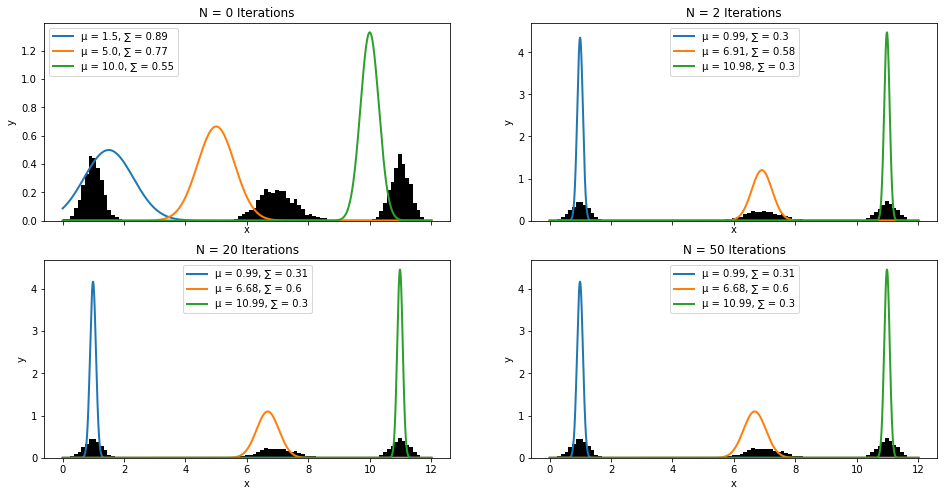

In [ ]:
#Project 5 | Expectation Maximization
#Layth Yassin, Husam Almanakly, and Ali Ghuman

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
from scipy.stats import multivariate_normal

figure, axarr = plt.subplots(2, 2, sharex=True, figsize=[16,8])

#1D Case
K = 3 
N = 1000
#Generate Data for each mean 
mu = np.array([1, 7, 11])
sig = np.array([0.3, 0.6, 0.3])

data1 = np.random.normal(mu[0], sig[0], N)
data2 = np.random.normal(mu[1], sig[1], N)
data3 = np.random.normal(mu[2], sig[2], N)
data = np.concatenate((data1, data2, data3))

bins = np.linspace(0, np.max(data), 100)
x_axis = np.linspace(0, np.max(data), N * K)

#function to calculate gamma
def calc_gamma(pie, mu, sigma):
    gamma = np.zeros((K*N, K))
    total = 0 
    for j in range(K): 
        total += pie[j]*norm.pdf(x_axis, mu[j], sigma[j])
    for i in range(K): 
       gamma[:,i] = pie[i]*norm.pdf(x_axis, mu[i], sigma[i])/total

    return gamma
#function to plot histograms of the data 
def plotHist(mu, sigma, axis, N):
    axis.hist(data, bins, density=True, color='black')
    for i in range(K): 
        axis.plot(x_axis, norm.pdf(x_axis, mu[i], sigma[i]), lw=2, label = f'µ = {round(mu[i],2)}, ∑ = {np.round(np.sqrt(sigma[i]),2)}')
    axis.legend()
    axis.set_title(f'N = {N} Iterations')
    axis.set_xlabel('x')
    axis.set_ylabel('y')


#EM Algorithm for Gaussian Mixtures
def EM(axis, mu, sigma, pie):
    #Calculate Gamma - 9.23
    gamma = calc_gamma(pie, mu, sigma)
    
    #Equation 9.27
    N_K = np.zeros(K)
    N_K[0] = np.sum(gamma[:,0])
    N_K[1] = np.sum(gamma[:,1])
    N_K[2] = np.sum(gamma[:,2])
    
    #Equation 9.24
    mu_new = np.zeros(K)
    mu_new[0] = 1/N_K[0] * np.sum(gamma[:,0]*data)
    mu_new[1] = 1/N_K[1] * np.sum(gamma[:,1]*data)
    mu_new[2] = 1/N_K[2] * np.sum(gamma[:,2]*data)
    
    #Equation 9.25
    sig_new = np.zeros(K)
    sig_new[0] = np.sum(gamma[:, 0]*(data-mu_new[0])*(data-mu_new[0]))/np.sum(N_K[0])
    sig_new[1] = np.sum(gamma[:, 1]*(data-mu_new[1])*(data-mu_new[1]))/np.sum(N_K[1]*35)
    sig_new[2] = np.sum(gamma[:, 2]*(data-mu_new[2])*(data-mu_new[2]))/np.sum(N_K[2])
    
    #Equation 9.26
    pie_new = np.zeros(K)
    pie_new[0] = N_K[0]/(N * K)
    pie_new[1] = N_K[1]/(N * K)
    pie_new[2] = N_K[2]/(N * K)

    return mu_new, sig_new, pie_new

#set up initial guesses
mu_guess = np.array([1.5, 5, 10])
sig_guess = np.array([0.8, 0.6, 0.3])
piE_guess = np.array([0.33, 0.33, 0.33])

#plot the guesses
plotHist(mu_guess, sig_guess, axarr[0,0], 0)

#set up loop to generate the values at set iteration and graph it
mu_1, sig_1, pie_1 = EM(axarr[0,1], mu_guess, sig_guess, piE_guess)
for i in range(51):
    mu2, sig2, pie2 = EM(axarr[0,0], mu_1,sig_1, pie_1)
    mu_1 = mu2
    sig_1 = sig2
    pie_1 = pie2
    if (i == 2):
        plotHist(mu2, sig2, axarr[0,1], i)
    if (i == 20):
        plotHist(mu2, sig2, axarr[1,0], i)
plotHist(mu2, sig2, axarr[1,1], i)

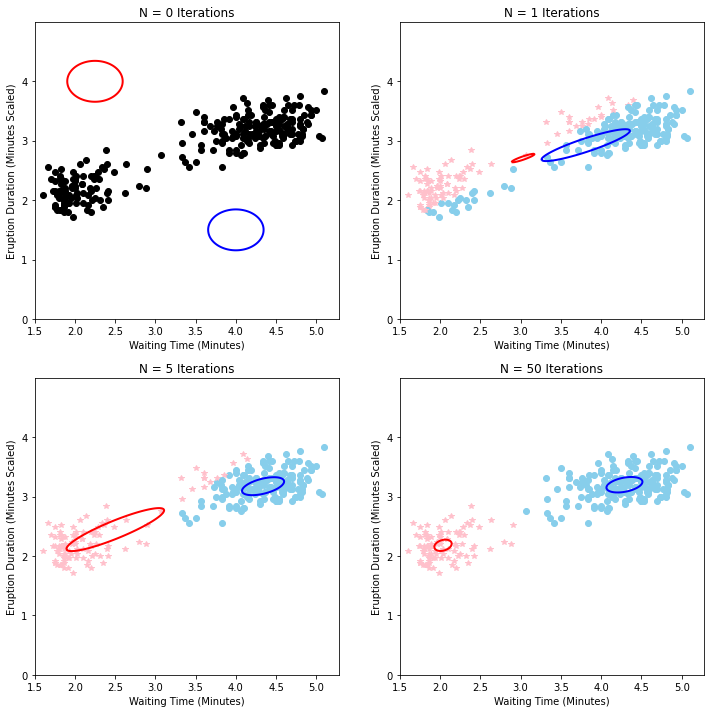

In [ ]:
###     2D Case     ###
figure, axarr = plt.subplots(nrows=2, ncols=2, figsize=[12,12])

N = 272
K = 2
#get old faithful data
fin = open('Old_faithful.txt')
f = fin.readlines()
data = np.zeros((N,2))
for i in range(N):
    x = f[i].split()
    data[i,0] = float(x[0])
    data[i,1] = float(x[1])/25
    axarr[0,0].plot(data[i,0],data[i,1], 'o', color = 'black')

#used to plot the dots with specified color based off gamma
def plotUpdate(gammas, mu, cov, axis, N):
    if(N != 0):
        for i in range(0, len(data)):
            alpha = np.argmax(gammas[i,:])
            if (alpha == 0):
                axis.plot(data[i,0],data[i,1], 'o', color = 'skyblue', zorder = 0)
                #axis.scatter(data[i,0],data[i,1], color = 'skyblue', zorder = 0)
            if (alpha == 1):
                axis.plot(data[i,0],data[i,1], '*', color = 'pink', zorder = 0)
                #axis.scatter(data[i,0],data[i,1], color = 'pink', zorder = 0)
#plot the circles around the mean
    x, y = np.mgrid[1.5:5:.01, 0:5:.01]
    pos = np.dstack((x, y))
    rv1 = multivariate_normal(mu[0], cov[0])
    rv2 = multivariate_normal(mu[1], cov[1])
    axis.contour(x, y, rv1.pdf(pos), colors = 'blue', levels = 0, zorder = 4, linewidths = 2)
    axis.contour(x, y, rv2.pdf(pos), colors = 'red', levels = 0, zorder = 3, linewidths = 2)
    axis.set_title(f'N = {N} Iterations')
    axis.set_xlabel('Waiting Time (Minutes)')
    axis.set_ylabel('Eruption Duration (Minutes Scaled)')
     
#EM algorithm for the 2D case, it closely represents the 1D case 
def EM_2D(mu, cov, pie):
    num1 = pie[0]*(multivariate_normal.pdf(data, mu[0], cov[0]))
    num2 = pie[1]*(multivariate_normal.pdf(data, mu[1], cov[1]))
    
    denom = num1 + num2
    
    gamma1 = np.atleast_2d(num1/denom)
    gamma2 = np.atleast_2d(num2/denom)
    
    mu_new1 = np.sum(data*gamma1.T, axis=0)/np.sum(gamma1, axis=1)
    mu_new2 = np.sum(data*gamma2.T, axis=0)/np.sum(gamma2, axis=1)

    cov_new1 = np.absolute((gamma1*(data-mu_new1).T@(data-mu_new1))/np.sum(gamma1, axis=1))
    cov_new2 = np.absolute((gamma2*(data-mu_new2).T@(data-mu_new2))/np.sum(gamma2, axis=1))
    
    pie_new1 = np.sum(gamma1, axis=1)/len(data)
    pie_new2 = np.sum(gamma2, axis=1)/len(data)
    
    mu_vec = [mu_new1, mu_new2]
    cov_vec = [cov_new1, cov_new2]
    pie_vec = [pie_new1, pie_new2]
    
    gamma_vec = np.concatenate((gamma1.T, gamma2.T), axis=1)

    return mu_vec, cov_vec, pie_vec, gamma_vec

#set up guesses
mu_guess = [[4.0, 1.5], [2.25, 4.0]]
cov_guess = [[[1, 0], [0, 1]], [[1, 0], [0, 1]]]
pie_guess = [.33, .33]
#plot guesses
plotUpdate(1, mu_guess, cov_guess, axarr[0,0], 0)

#set up loop to get values at specified iteration and plot them 
mu1, cov1, pie1, gamma1 = EM_2D(mu_guess, cov_guess, pie_guess)
plotUpdate(gamma1, mu1, cov1, axarr[0, 1],1) 
for i in range(0,51):
    mu2, cov2, pie2, gamma2 = EM_2D(mu1, cov1, pie1)
    mu1 = mu2
    cov1 = cov2
    pie1 = pie2
    if (i == 5):
        plotUpdate(gamma2, mu2, cov2, axarr[1, 0], i) 
    if (i == 50): 
        plotUpdate(gamma2, mu2, cov2, axarr[1, 1], i) 

plt.show()